In [22]:
from rydbperc2 import ryperc2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [23]:
N_atoms = 1000
two_ph_rabi_frequency = 0.2 # MHz
dephasing = 8 # MHz
detuning = 1 # MHz
C6 = 870 * 10**3 # MHz*um^6
gamma_ry = 0.001

In [24]:
p_s = []
p_f = []
r = []
detunings = np.linspace(-50,50, 1000)
for detuning in detunings:    
    cloud = ryperc2.cluster3D(N_atoms)
    cloud.set_evolution_parameters(
        two_ph_rabi_frequency,
        dephasing,
        detuning,
        C6,
        gamma_ry
        )
    p_s.append(cloud.spont_exct_rate)
    p_f.append(cloud.facilitation_rate)
    r.append(cloud.facilitation_radius)

blockade radius (6.9 um) < facilitation radius (16.1 um)
blockade radius (6.9 um) < facilitation radius (13.4 um)
blockade radius (6.9 um) < facilitation radius (12.3 um)
blockade radius (6.9 um) < facilitation radius (11.6 um)
blockade radius (6.9 um) < facilitation radius (11.2 um)
blockade radius (6.9 um) < facilitation radius (10.8 um)
blockade radius (6.9 um) < facilitation radius (10.5 um)
blockade radius (6.9 um) < facilitation radius (10.2 um)
blockade radius (6.9 um) < facilitation radius (10.0 um)
blockade radius (6.9 um) < facilitation radius (9.9 um)
blockade radius (6.9 um) < facilitation radius (9.7 um)
blockade radius (6.9 um) < facilitation radius (9.5 um)
blockade radius (6.9 um) < facilitation radius (9.4 um)
blockade radius (6.9 um) < facilitation radius (9.3 um)
blockade radius (6.9 um) < facilitation radius (9.2 um)
blockade radius (6.9 um) < facilitation radius (9.1 um)
blockade radius (6.9 um) < facilitation radius (9.0 um)
blockade radius (6.9 um) < facilitation

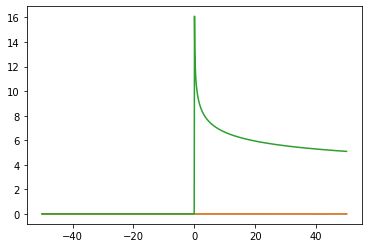

In [25]:
plt.plot(detunings ,p_s)
plt.plot(detunings, p_f)
plt.plot(detunings, r)
plt.show()

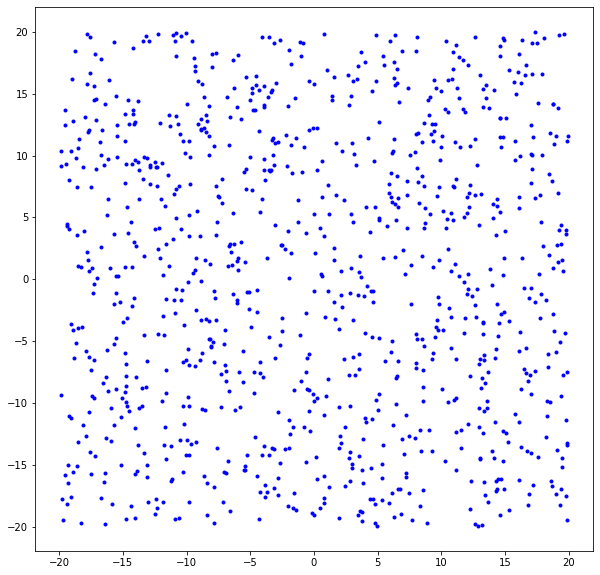

In [26]:
cloud = ryperc2.cluster3D(N_atoms, shape = [40,40,40], is_2D=True)
cloud.set_evolution_parameters(
    two_ph_rabi_frequency,
    dephasing,
    detuning,
    C6,
    gamma_ry
    )
cloud.show()

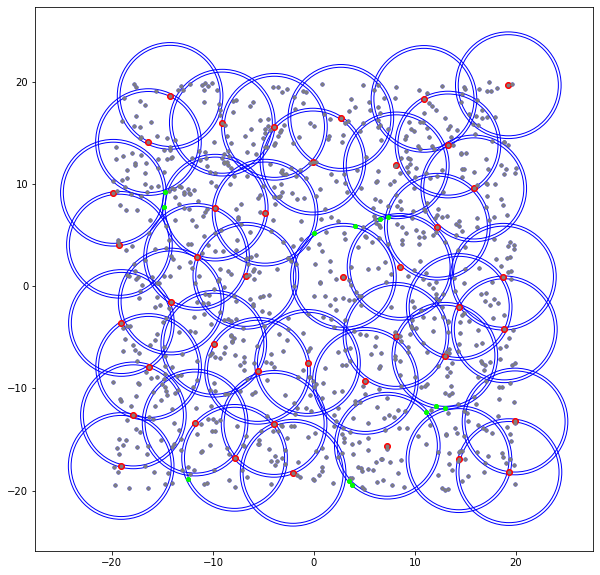

In [67]:
cloud.evolution_step(100)
cloud.show()

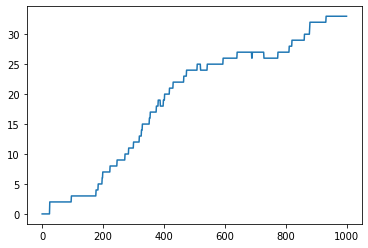

In [ ]:
plt.plot(evolution)
plt.show()

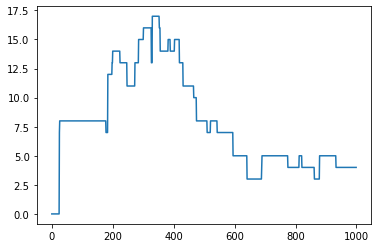

In [ ]:
plt.plot(facilitated_exc)
plt.show()

In [ ]:
N_atoms = 10000
two_ph_rabi_frequency = 0.2 # MHz
dephasing = 0.7 # MHz
detuning = 40 # MHz
C6 = 870 * 10**3 # MHz*um^6
gamma_ry = 0.002
shape = [80,80,100]

cloud = ryperc2.cluster3D(N_atoms, shape = shape)
cloud.set_evolution_parameters(
    two_ph_rabi_frequency,
    dephasing,
    detuning,
    C6,
    gamma_ry
    )

print("density = ", N_atoms/(shape[0]*shape[1]*shape[2]*10**-2))

density =  1.5625


In [ ]:
time = 10
steps = 1000

times = np.linspace(0, time, steps)

def experiment(without_facilitation = False, seeds = 0):
    if without_facilitation:
        _C6=0
    else:
        _C6=C6
    excs = []
    fac_exc = []
    repetitions = 100
    for _ in range(repetitions):
        clear_output(wait=True)
        print(_)
        cloud = ryperc2.cluster3D(N_atoms, shape = shape)
        cloud.set_evolution_parameters(
            two_ph_rabi_frequency,
            dephasing,
            detuning,
            _C6,
            gamma_ry
            )
        res, fac_res = cloud.evolve(time, steps, excitation_steps=1, seeds=seeds)
        excs.append(res)
        fac_exc.append(fac_res)
    
    return np.mean(excs, axis=0), np.mean(fac_exc, axis=0)

In [ ]:
print(
    cloud.blockade_radius,
    cloud.facilitation_rate,
    cloud.spont_exct_rate,
    cloud.facilitation_radius,
    cloud.facilitation_delta_radius
)

10.368999863669515 0.22857142857142865 1.7498660258823937e-05 5.283356022292281 0.030819576796704974


In [ ]:
means, fac_means = experiment()
means_3, fac_means_3 = experiment(seeds = 3)

99


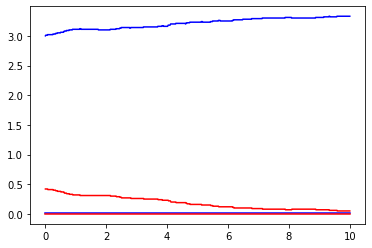

In [ ]:
plt.plot(times, means, "blue")
plt.plot(times, fac_means, "red")

plt.plot(times, means_3, "blue")
plt.plot(times, fac_means_3, "red")
plt.show()